In [1]:
from rio_tiler.io import Reader
from rio_tiler.models import ImageData
from rio_tiler.colormap import cmap
import matplotlib.pyplot as plt
from rasterio import windows
cm = cmap.get("viridis")
from scipy.interpolate import griddata
import cv2
import pyproj

In [3]:
tile = (70, 30)
zoom = 7
tilesize = 256
tif = "http://nginx-dev/data/layers/test.tif.cog"

In [11]:
def basic(x, y, zoom):
    with Reader(tif) as dst:
        img = dst.tile(x, y, zoom, tilesize=tilesize, buffer=tilesize*2)
        stats = img.statistics()
        bs = stats.get('b1')
        bstats = (bs.min, bs.max)
        
        bounds = windows.bounds(windows.Window(tilesize, tilesize, tilesize, tilesize), img.transform)
        img = img.clip(bounds)
        
        img.rescale(
            in_range=(bstats,),
            out_range=((0, 255),)
        )
        return img.data_as_image()
    

In [12]:
def equalized(x, y, zoom):
    with Reader(tif) as dst:
        img = dst.tile(x, y, zoom, tilesize=tilesize, buffer=tilesize*2)
        stats = img.statistics()
        bs = stats.get('b1')
        bstats = (bs.min, bs.max)
        
        img.rescale(
            in_range=(bstats,),
            out_range=((0, 255),)
        )
        eq_img = cv2.equalizeHist(img.data_as_image())
        bounds = windows.bounds(windows.Window(tilesize, tilesize, tilesize, tilesize), img.transform)
        img = img.clip(bounds)
        new_img = ImageData(
            eq_img[tilesize:tilesize*2, tilesize:tilesize*2],
            assets=img.assets,
            crs=img.crs,
            bounds=img.bounds,
        )
        return new_img.data_as_image()



In [12]:
def equalized_2(x, y, zoom, buffer=512):
    with Reader(tif) as dst:
        img = dst.tile(x, y, zoom, tilesize=tilesize, buffer=buffer)
        stats = img.statistics()
        bs = stats.get('b1')
        bstats = (bs.min, bs.max)
        
        img.rescale(
            in_range=(bstats,),
            out_range=((0, 255),)
        )
        eq_img = cv2.equalizeHist(img.data_as_image())
        bounds = windows.bounds(windows.Window(tilesize, tilesize, tilesize, tilesize), img.transform)
        img = img.clip(bounds)
        new_img = ImageData(
            eq_img[tilesize:tilesize*2, tilesize:tilesize*2],
            assets=img.assets,
            crs=img.crs,
            bounds=img.bounds,
        )
        return new_img.data_as_image()



In [13]:
def equalized_interpoleted(x, y, zoom):
    with Reader(tif) as dst:
        img = dst.tile(x, y, zoom, tilesize=tilesize, buffer=tilesize*2)
        stats = img.statistics()
        bs = stats.get('b1')
        bstats = (bs.min, bs.max)
        
        img.rescale(
            in_range=(bstats,),
            out_range=((0, 255),)
        )
        eq_img = cv2.equalizeHist(img.data_as_image())
        
        bounds = windows.bounds(windows.Window(tilesize, tilesize, tilesize, tilesize), img.transform)
        img = img.clip(bounds)
        
        new_img = ImageData(
            eq_img[tilesize:tilesize*2, tilesize:tilesize*2],
            assets=img.assets,
            crs=img.crs,
            bounds=img.bounds,
        )
        return new_img.data_as_image()



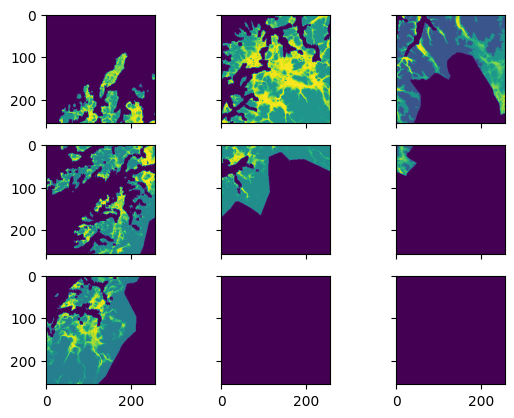

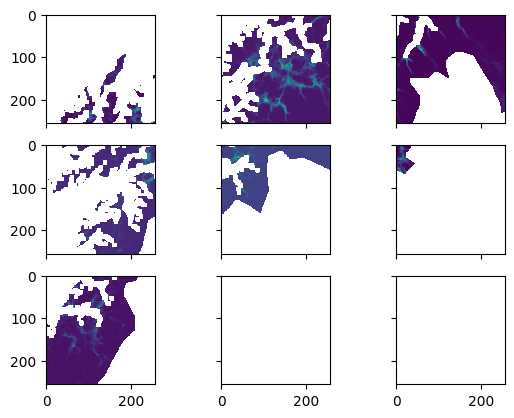

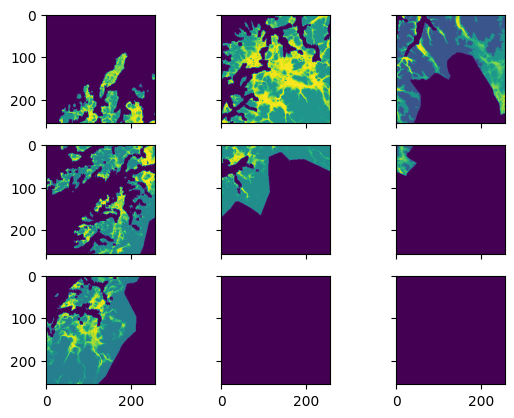

In [21]:
def mapplot(fn, start_x, start_y, zoom, grid=3):
    fig, axs = plt.subplots(grid, grid, sharex=True, sharey=True)
    for x in range(start_x, start_x + grid):
        for y in range(start_y, start_y + grid):
            axs[y - start_y,x - start_x].imshow(fn(x, y, zoom))

    plt.show()

mapplot(equalized, *tile, zoom)
mapplot(basic, *tile, zoom)
mapplot(equalized_interpoleted, *tile, zoom)




In [7]:
dst= Reader(tif)
img = dst.tile(*tile, zoom, tilesize=tilesize, buffer=tilesize*2)
img.__dict__

{'array': masked_array(
   data=[[[nan, nan, nan, ..., 4207.4736328125, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]],
   mask=[[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]]],
   fill_value=nan,
   dtype=float32),
 'assets': ['http://nginx-dev/data/layers/test.tif.cog'],
 'bounds': BoundingBox(left=1252344.2714243305, bottom=9705668.103538543, right=2817774.6107047345, top=11271098.442818949),
 'crs': CRS.from_epsg(3857),
 'metadata': {'AREA_OR_POINT': 'Area'},
 'ba